# Summarize PCSF output from 122915 run - December 29, 2015
## Initializations

In [1]:
%pylab inline

import sys, os, csv, glob
import SummarizeSif, KSHVUtil

resultsDir = r'/home/dylan/Documents/HDD/Wisconsin/PCSF-06_30_17'#os.path.join('..','..', 'results')
prizeFile = r'/home/dylan/Documents/HDD/Wisconsin/osmotic-stress/Notebooks/'#os.path.join('..','..','data','prizes','101515','combined','maxProteinScores2KM_tfPrizes.txt')

Populating the interactive namespace from numpy and matplotlib


## Summarize output
1000 PCSF runs with $\beta$=4.75 $\mu$=0.020 $\omega$=2.5.  Used $r = 0.01$ to generate random noise on edges.  Used UBC degree and forest size to help choose the optimal parameters.

Check for errors to report non-empty error files.

In [2]:
prizeFile = prizeFile + 'prizes.txt'
indir = r'/home/dylan/Documents/HDD/Wisconsin/NoisePCSF-06_30_17/'#os.path.join(resultsDir, 'NoisePCSF')
runname = 'prizes'
pattern = '*optimalForest.sif'
outfile = r'/home/dylan/Documents/HDD/Wisconsin/osmotic-stress/Notebooks/Forest-TPS/' #os.path.join(indir, runname + '_ForestSummary')

errFiles = glob.glob(os.path.join(indir, '*.err'))
print '%d non-empty error files' % len([f for f in errFiles if os.path.getsize(f) > 0])

args = ['--indir', indir, '--pattern', pattern, '--prizefile', prizeFile, '--outfile', outfile, '--hubnode', 'UBC']
SummarizeSif.main(args)

0 non-empty error files
1596 prizes loaded
1000 forests loaded
0 empty forests


## Plot distributions of forest sizes
Load the columns and generate plots.  Reuses old code, can update to use pandas later.  As seen below, the inclusion/exclusion of UBC can lead to two different regimes.

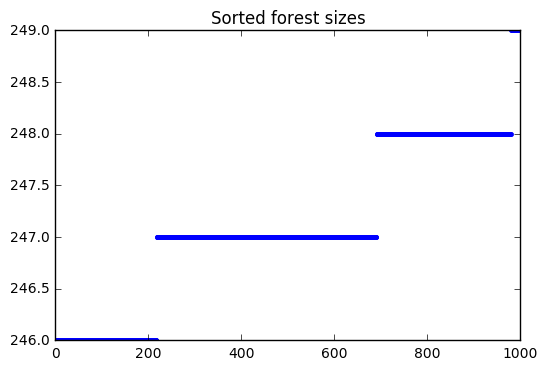

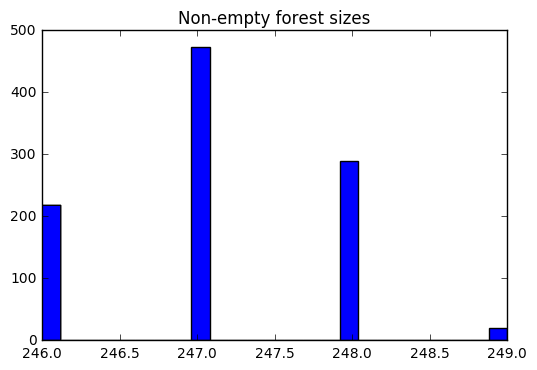

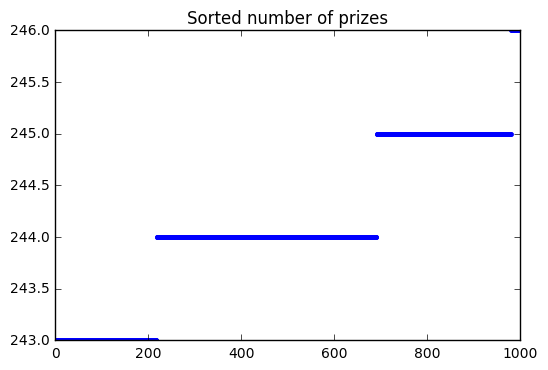

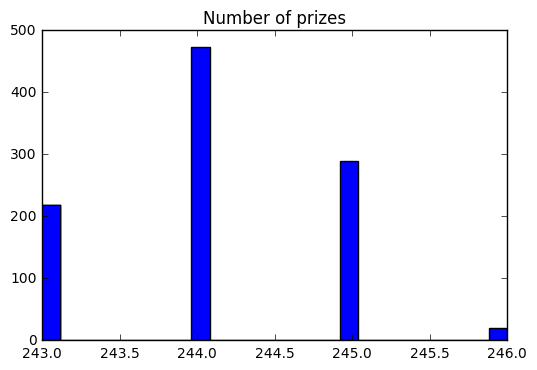

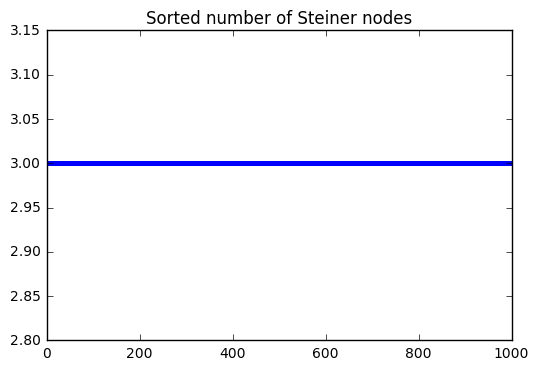

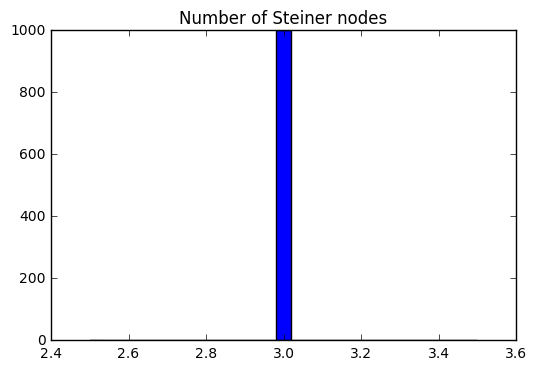

In [3]:
with open(outfile + '_size.txt') as sizeFile:
    reader = csv.DictReader(sizeFile, delimiter = '\t')
    sizeContents = list(reader)
forestSizes = [int(row['Forest size']) for row in sizeContents]
plot(sorted(forestSizes), '.');
title('Sorted forest sizes');
figure()
hist([s for s in forestSizes if s > 0], 25);
title('Non-empty forest sizes');

figure()
prizes = [int(row['Prizes in forest']) for row in sizeContents]
plot(sorted(prizes), '.');
title('Sorted number of prizes');
figure()
hist(prizes, 25);
title('Number of prizes');

figure()
steinerNodes = [int(row['Steiner nodes']) for row in sizeContents]
plot(sorted(steinerNodes), '.');
title('Sorted number of Steiner nodes');
figure()
hist(steinerNodes, 25);
title('Number of Steiner nodes');

## Plot distributions of UBC hub protein degree
Extremely bimodal distribution where either UBC is absent or is a major hub.  Forest sizes look relatively stable within the no-UBC forests.

1000 forests of 1000 do not contain UBC


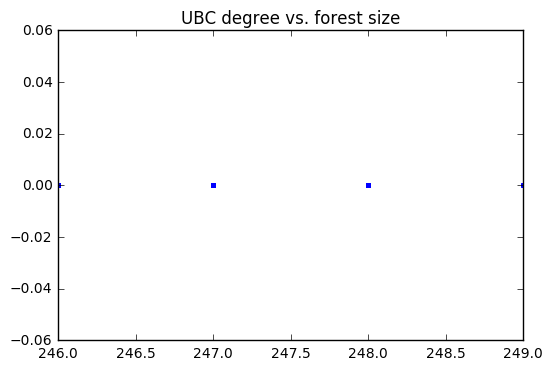

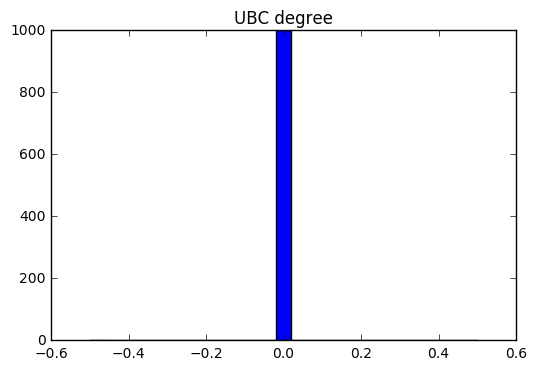

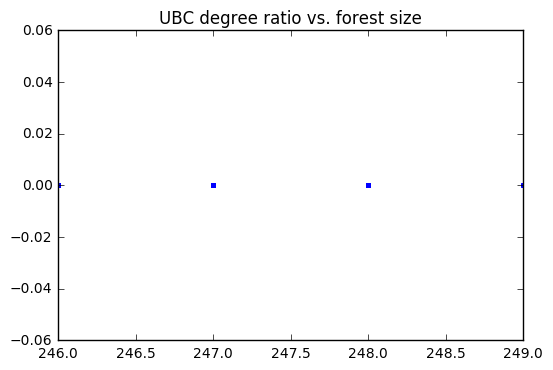

In [4]:
ubcDegree = [int(row['UBC degree']) for row in sizeContents]
plot(forestSizes, ubcDegree, '.');
title('UBC degree vs. forest size');
figure()
hist(ubcDegree, 25);
title('UBC degree');

figure()
ubcDegreeRatio = [float(row['UBC degree / forest size']) for row in sizeContents]
plot(forestSizes, ubcDegreeRatio, '.');
title('UBC degree ratio vs. forest size');

noUbcCount = sum([1 for deg in ubcDegree if deg == 0])
print "%d forests of %d do not contain UBC" % (noUbcCount, len(ubcDegree))

## Filter the forests that contain UBC
Remove all forests with UBC, then resummarize the remaining forests.  This subset summary is designated 'noUBC'.

Forest sizes range from 617 to 649. The union network contains 1253 edges.  44 Steiner nodes appear in any noUBC forest, 17 in all noUBC forests, 29 appear in 50% or more.  Frequency of 0.0018796992481203006 (1/532) means the node appeared in a single forest.

In [5]:
noUbcNames = [row['Forest name'] for row in sizeContents if int(row['UBC degree']) == 0]
siflist = "|".join(noUbcNames)
outfile = os.path.join(indir, runname + '_noUBC_forestSummary')

args = ['--indir', indir, '--siflist', siflist, '--prizefile', prizeFile, '--outfile', outfile, '--hubnode', 'UBC', '--cyto3']
SummarizeSif.main(args)

1596 prizes loaded
1000 forests loaded
0 empty forests


## Save a list of all nodes in forest and all Steiner nodes in noUBC union forest
These can be used for enrichment analysis

In [6]:
with open(outfile + '_nodeAnnotation.txt') as nodeFile:
    reader = csv.DictReader(nodeFile, delimiter = '\t')
    nodeContents = list(reader)
forestNodeList = [row['Protein'] for row in nodeContents]
print "%d proteins in %s_union.sif" % (len(forestNodeList), outfile)
KSHVUtil.WriteCollection(outfile + '_union_allNodes.txt', sorted(forestNodeList))

steinerNodeList = [row['Protein'] for row in nodeContents if float(row['Prize'] == "")]
print "%d Steiner nodes in %s_union.sif" % (len(steinerNodeList), outfile)
KSHVUtil.WriteCollection(outfile + '_union_steinerNodes.txt', sorted(steinerNodeList))

250 proteins in /home/dylan/Documents/HDD/Wisconsin/NoisePCSF-06_30_17/prizes_noUBC_forestSummary_union.sif
3 Steiner nodes in /home/dylan/Documents/HDD/Wisconsin/NoisePCSF-06_30_17/prizes_noUBC_forestSummary_union.sif
